## Assignment 6

### Helper Function

In [1]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


### Loading the Iris dataset

In [2]:
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'], header = None)
iris = iris.dropna()

### A scatterplot matrix of scatterplots, with one scatterplot for each pairwise combination of features.

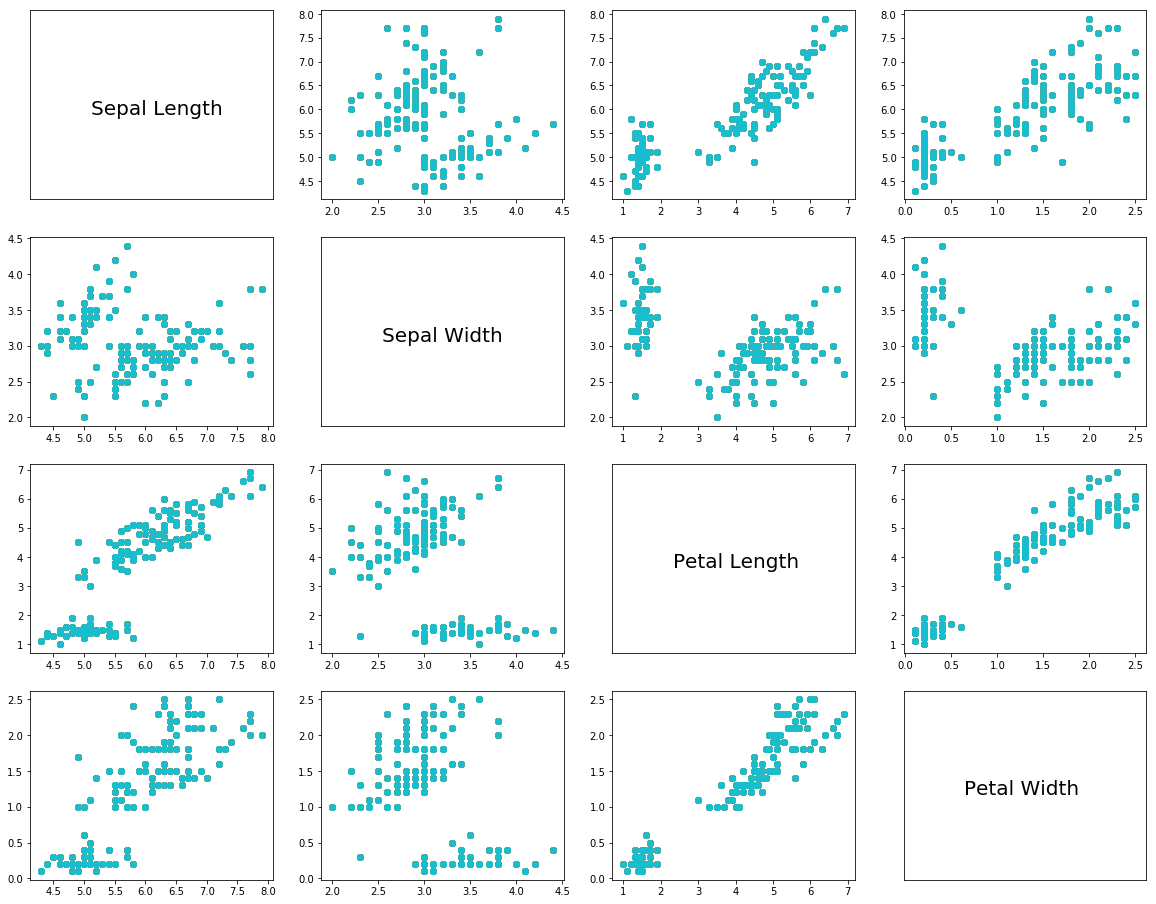

In [3]:
pairs(iris)

### A plot of the linear regression models generated on each pairwise combination of features, with corresponding model statistics.

In [18]:
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

def plotLinearReg(n, m):
    xPlot = iris[[n]]
    yPlot = iris[[m]]
    
    colx_train, colx_test, coly_train, coly_test = train_test_split(xPlot, yPlot)
    
    regr = linear_model.LinearRegression()
    regr.fit(colx_train, coly_train)

    # The coefficients
    print('Coefficients:', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % 
          np.mean((regr.predict(colx_test) - coly_test) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(colx_test, coly_test))

    plt.scatter(colx_test, coly_test)
    plt.plot(colx_test, regr.predict(colx_test), color='black', linewidth=1)
    plt.xlabel(n)
    plt.ylabel(m)
    plt.show()

### Sepal Length and Sepal Width

Coefficients: [[-0.09417893]]
Mean squared error: 0.22
Variance score: -0.07


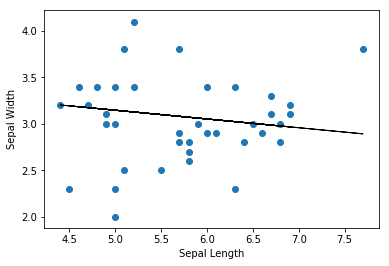

In [5]:
plotLinearReg('Sepal Length', 'Sepal Width')

### Sepal Width and Sepal Length

Coefficients: [[-0.17656313]]
Mean squared error: 0.82
Variance score: 0.01


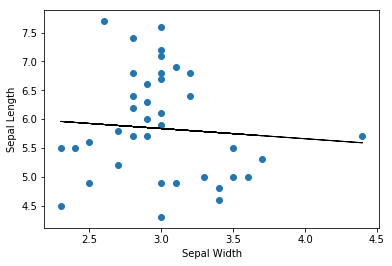

In [6]:
plotLinearReg('Sepal Width', 'Sepal Length')

### Sepal Length and Petal Length

Coefficients: [[1.86243452]]
Mean squared error: 0.93
Variance score: 0.69


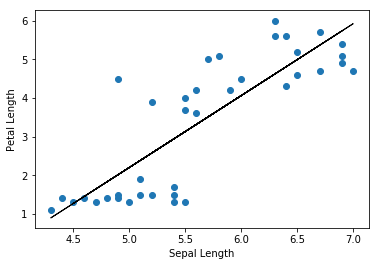

In [7]:
plotLinearReg('Sepal Length', 'Petal Length')

### Petal Length and Sepal Length

Coefficients: [[0.41726738]]
Mean squared error: 0.15
Variance score: 0.75


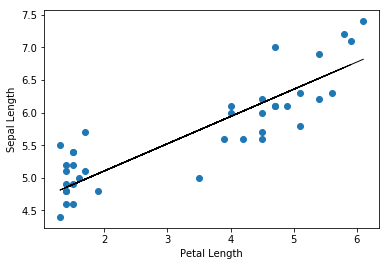

In [8]:
plotLinearReg('Petal Length', 'Sepal Length')

### Sepal Length and Petal Width 

Coefficients: [[0.75878937]]
Mean squared error: 0.13
Variance score: 0.74


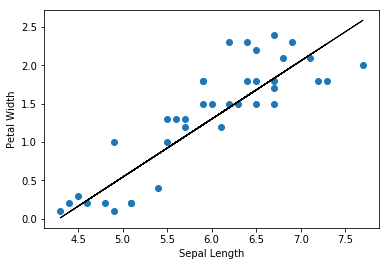

In [9]:
plotLinearReg('Sepal Length', 'Petal Width')

### Petal Width and Sepal Length

Coefficients: [[0.89058414]]
Mean squared error: 0.20
Variance score: 0.69


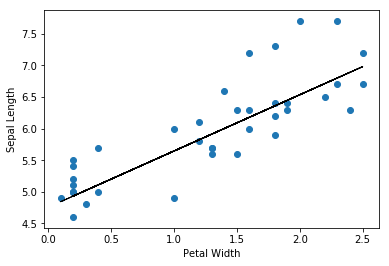

In [10]:
plotLinearReg('Petal Width', 'Sepal Length')

### Sepal Width and Petal Length

Coefficients: [[-1.7900165]]
Mean squared error: 2.33
Variance score: 0.07


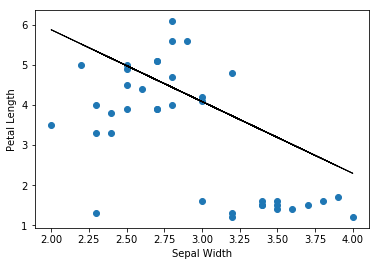

In [11]:
plotLinearReg('Sepal Width', 'Petal Length')

### Petal Length and Sepal Width

Coefficients: [[-0.12100267]]
Mean squared error: 0.16
Variance score: -0.09


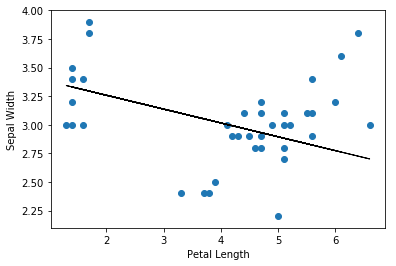

In [12]:
plotLinearReg('Petal Length', 'Sepal Width')

### Sepal Width and Petal Width

Coefficients: [[-0.68159569]]
Mean squared error: 0.48
Variance score: 0.03


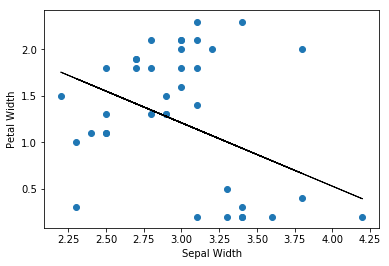

In [13]:
plotLinearReg('Sepal Width', 'Petal Width')

### Petal Width and Sepal Width

Coefficients: [[-0.18796083]]
Mean squared error: 0.15
Variance score: 0.13


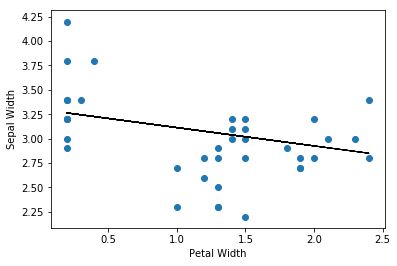

In [14]:
plotLinearReg('Petal Width', 'Sepal Width')

### Petal Width and Petal Length

Coefficients: [[2.2403938]]
Mean squared error: 0.27
Variance score: 0.90


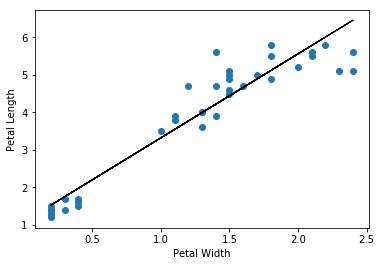

In [15]:
plotLinearReg('Petal Width', 'Petal Length')

### Petal Length and Petal Width

Coefficients: [[0.41124025]]
Mean squared error: 0.04
Variance score: 0.93


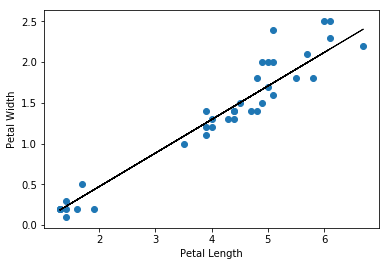

In [16]:
plotLinearReg('Petal Length', 'Petal Width')

### The plot of the best of the set of linear regression models generated in the last step; please also present the corresponding model statistics

As we can see from the above set of linear regression models, Petal length and Petal width appears to be the best among all.

Coefficients: [[0.42084551]]
Mean squared error: 0.04
Variance score: 0.93


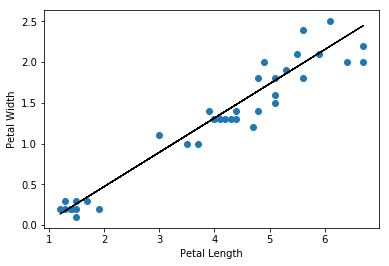

In [17]:
plotLinearReg('Petal Length', 'Petal Width')

### Given this output, respond to the following questions:

#### Based upon the linear models you generated, which pair of features appear to be most predictive for one another? Note that you can answer this question based upon the output provided for the linear models.


As observed from the above set of linear regression models we can say that Petal Width and Petal Length appears to be most predictive for one another. It has a minimum mean squared error and its variance score is almost close to 1. Based on these numbers we can say that Petal Width and Petal Length are most predictive for one another.

#### Suppose you tried to generate a classification model on this dataset, but only after removing the feature that you were best able to predict based upon other features. How would removing this feature affect the classification performance?

From the above information we came to the conclusion that Petal Width and Petal Length are most predictive of one another. Suppose if we remove Petal Width, then we can safely say that it will not affect the classification performance due to its high variance. Consider removing Sepal Width that is removing a feature with low variance score, then this will affect the classification performance and lead to a low explicit classification. 